## Wiener process

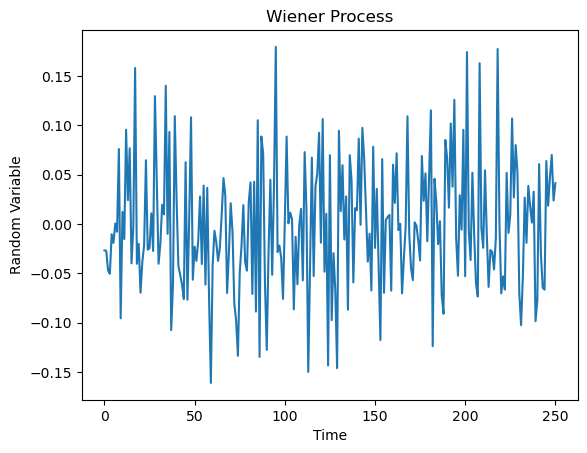

<Figure size 1000x600 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

T=1
N=252
dt = T/N
W_values = []

for t in range(1, T*N):
    W = 0
    dW = np.random.normal(0,np.sqrt(dt))
    W = W + dW
    W_values.append(W)

plt.plot(W_values)
plt.title('Wiener Process')
plt.xlabel('Time')
plt.ylabel('Random Variable')
plt.figure(figsize=(10, 6))
plt.show()

## Normal and lognormal distribution

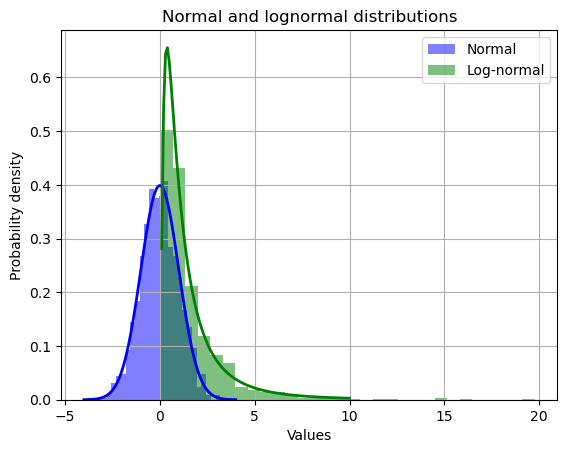

<Figure size 1000x600 with 0 Axes>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres de la distribution normale
mu = 0  # Moyenne
sigma = 1  # Écart type

# Paramètres de la distribution log-normale
mu_log = 0  # Moyenne logarithmique
sigma_log = 1  # Écart type logarithmique

# Génération d'échantillons à partir des distributions normale et log-normale
samples_normal = np.random.normal(mu, sigma, 1000)
samples_log_normal = np.random.lognormal(mu_log, sigma_log, 1000)

# Affichage de l'histogramme des échantillons de la distribution normale
plt.hist(samples_normal, bins=30, density=True, alpha=0.5, color='b', label='Normal')

# Affichage de l'histogramme des échantillons de la distribution log-normale
plt.hist(samples_log_normal, bins=30, density=True, alpha=0.5, color='g', label='Log-normal')

# Affichage de la fonction de densité de probabilité (PDF) de la distribution normale
x = np.linspace(-4, 4, 100)
pdf_normal = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2))
plt.plot(x, pdf_normal, color='b', linewidth=2)

# Affichage de la fonction de densité de probabilité (PDF) de la distribution log-normale
x_log = np.linspace(0.1, 10, 100)
pdf_log_normal = (1/(x_log * sigma_log * np.sqrt(2 * np.pi))) * np.exp(-(np.log(x_log) - mu_log)**2 / (2 * sigma_log**2))
plt.plot(x_log, pdf_log_normal, color='g', linewidth=2)

plt.title('Normal and lognormal distributions')
plt.xlabel('Values')
plt.ylabel('Probability density')
plt.legend()
plt.grid(True)
plt.figure(figsize=(10, 6))
plt.show()

## Geometric Brownian Motion

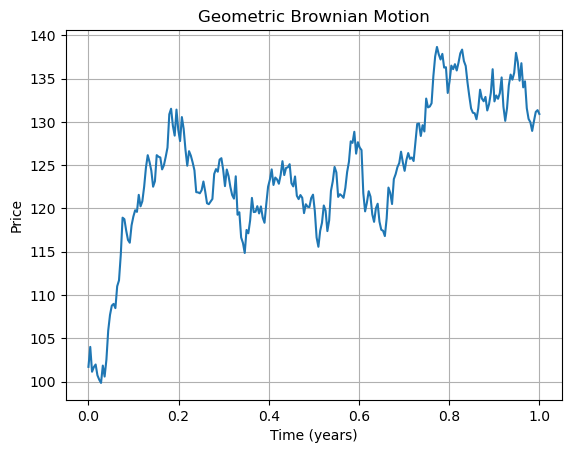

<Figure size 1000x600 with 0 Axes>

In [3]:
def geometric_brownian_motion(T, N, mu, sigma, S0):
    dt = T / N
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size=N)
    W = np.cumsum(W) * np.sqrt(dt)
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X)
    return t, S

# Paramètres de la simulation
T = 1.0 # Durée de la simulation en années
N = 252 # Nombre de pas de temps
mu = 0.05 # Taux de rendement moyen
sigma = 0.2 # Volatilité
S0 = 100 # Prix initial

# Simulation de la Brownian Motion géométrique
t, S = geometric_brownian_motion(T, N, mu, sigma, S0)

# Affichage du graphique
plt.plot(t, S)
plt.title('Geometric Brownian Motion')
plt.xlabel('Time (years)')
plt.ylabel('Price')
plt.grid(True)
plt.figure(figsize=(10, 6))
plt.show()

## Black & Scholes model

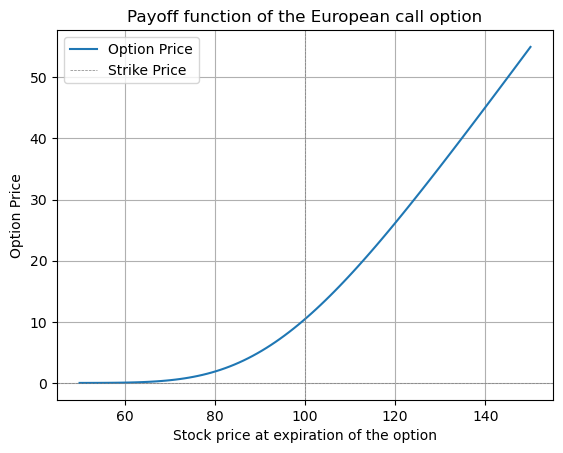

<Figure size 1000x600 with 0 Axes>

Call price with binomial model: 10.450583572185565


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def black_scholes_call(S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Parameters
S = np.linspace(50, 150, 100)  # Different values of stock price
K = 100  # Strike price of the option
r = 0.05  # Risk-free interest rate
T = 1    # Time to expiration of the option (in years)
sigma = 0.2  # Volatility

# Calculating the price of the European call option for different values of S
call_prices = black_scholes_call(S, K, r, T, sigma)

# Plotting the payoff function of the European call option
plt.plot(S, call_prices, label="Option Price")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(K, color='gray', linestyle='--', linewidth=0.5, label='Strike Price')
plt.title("Payoff function of the European call option")
plt.xlabel("Stock price at expiration of the option")
plt.ylabel("Option Price")
plt.legend()
plt.grid(True)
plt.figure(figsize=(10, 6))
plt.show()

print('Call price with binomial model:', black_scholes_call(100, 100, 0.05, 1, 0.2))

## Binomial Tree model

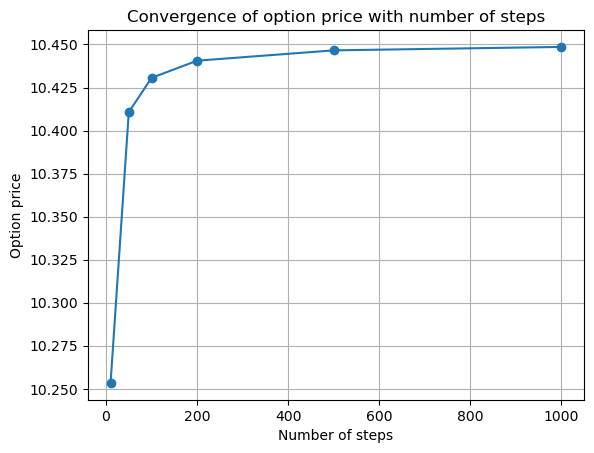

<Figure size 1000x600 with 0 Axes>

Call price with binomial model: 10.448584103764572


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def binomial_tree_call(S, K, r, T, sigma, n):
    dt = T / n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    
    # Création de l'arbre des prix de l'actif sous-jacent
    stock_tree = np.zeros((n+1, n+1))
    option_values = np.zeros((n+1, n+1))  # Correction ici
    
    for i in range(n+1):
        for j in range(i+1):
            stock_tree[j, i] = S * (u ** (i-j)) * (d ** j)
    
    # Calcul de la valeur de l'option à l'expiration
    option_values[:, n] = np.maximum(0, stock_tree[:, n] - K)  # Correction ici
    
    # Rétro-propagation pour évaluer la valeur de l'option à chaque nœud
    for i in range(n-1, -1, -1):
        for j in range(i+1):
            option_values[j, i] = np.exp(-r * dt) * (p * option_values[j, i+1] + (1 - p) * option_values[j+1, i+1])
    
    return option_values[0, 0]

# Paramètres de l'option
S0 = 100  # Prix actuel de l'actif sous-jacent
K = 100   # Prix d'exercice de l'option
r = 0.05  # Taux d'intérêt sans risque
T = 1     # Temps jusqu'à l'expiration de l'option (en années)
sigma = 0.2  # Volatilité de l'actif sous-jacent

# Nombre initial de steps
n_steps = [10, 50, 100, 200, 500, 1000]
prices = []

for n in n_steps:
    call_price = binomial_tree_call(S0, K, r, T, sigma, n)
    prices.append(call_price)

# Plot
plt.plot(n_steps, prices, marker='o')
plt.title("Convergence of option price with number of steps")
plt.xlabel('Number of steps')
plt.ylabel('Option price')
plt.grid(True)
plt.figure(figsize=(10, 6))
plt.show()


print('Call price with binomial model:', binomial_tree_call(100, 100, 0.05, 1, 0.2, 1000))

## Monte Carlo model

Option price : 10.34


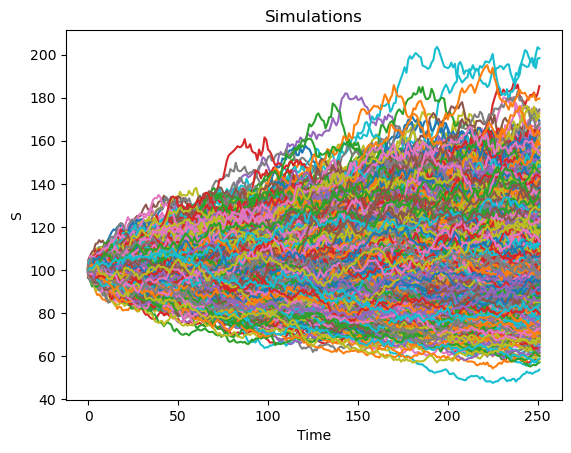

<Figure size 1000x600 with 0 Axes>

In [6]:
T = 1
N = 252
dt = T / N
sigma = 0.20
nb_sim = 2000
r = 0.05
S = 100
K = 100

option_type='call'

#Simulations of lnS
lnS_values = np.zeros((N, nb_sim))
for i in range(nb_sim):
    lnS = np.log(S)
    for j in range(N):
        dlnS = (r - sigma ** 2 / 2) * dt + sigma * np.random.normal(0, 1) * np.sqrt(dt)
        lnS = lnS + dlnS
        lnS_values[j, i] = lnS

#Payoff Simulations
payoff_values = []
for i in range(nb_sim):
    lnS = lnS_values[-1, i]
    if option_type=='call':
        payoff_values.append(np.maximum(0, np.exp(lnS) - K))
    elif option_type=='put':
        payoff_values.append(np.maximum(0, K - np.exp(lnS)))

option_price = np.mean(payoff_values) * np.exp(-r * T)

print("Option price :", round(option_price,2))

#Plotting lnS simulations
plt.plot(np.exp(lnS_values))
plt.title('Simulations')
plt.xlabel('Time')
plt.ylabel('S')
plt.figure(figsize=(10, 6))
plt.show()

## SPX normal dist

[*********************100%***********************]  1 of 1 completed
Skewness: -0.1544988088612141
Kurtosis: 10.121618267280184
Jarque-Bera test statistic: 26114.191269830582
Jarque-Bera p-value: 0.0


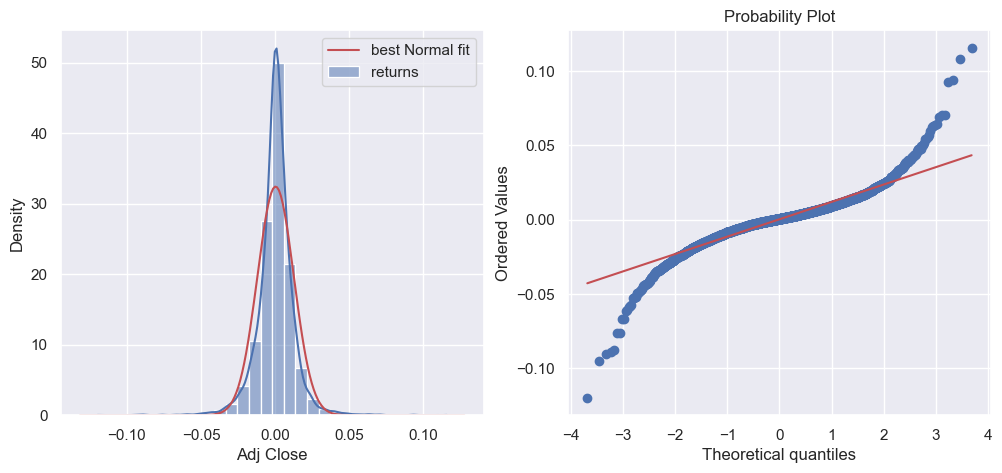

In [7]:
import numpy as np
import yfinance as yf
import datetime
import pandas as pd
import math

from scipy import stats
from statsmodels.tsa.api import adfuller, kpss, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import het_arch
from arch import arch_model

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
sns.set()

end_date = datetime.date(2024,4,21)
start_date = datetime.date(2000,1,1)
tickers = ['^GSPC']

stock = yf.download(tickers, start_date, end_date)
stock = stock['Adj Close']
stock_return = stock / stock.shift(1) - 1
stock_return = stock_return.dropna()

from scipy.stats import skew, kurtosis, jarque_bera

# Calcul du skewness
skewness = skew(stock_return)
print("Skewness:", skewness)

# Calcul du kurtosis
kurt = kurtosis(stock_return)
print("Kurtosis:", kurt)

# Test de Jarque-Bera
jb_test = jarque_bera(stock_return)
print("Jarque-Bera test statistic:", jb_test[0])
print("Jarque-Bera p-value:", jb_test[1])

def hist_probplot(stock_return, bins='auto'):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    sns.histplot(data=stock_return, bins=bins, kde=True, stat='density', ax=ax[0], label="returns")
    xmin, xmax = ax[0].get_xlim()
    x = np.linspace(xmin, xmax, 200)
    y = stats.norm.pdf(x, loc=stock_return.mean(), scale=stock_return.std(ddof=0))
    ax[0].plot(x, y, 'r', label="best Normal fit")
    ax[0].legend()

    stats.probplot(stock_return, plot=ax[1])
    
    return fig

fig = hist_probplot(stock_return, bins=30)

## Jump-diffusion model

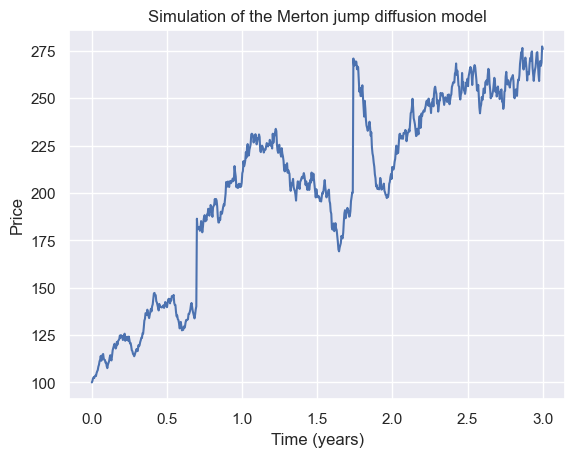

<Figure size 1000x600 with 0 Axes>

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def merton_jump_diffusion(T, N, mu, sigma, lamb, alpha, delta, S0):
    dt = T / N
    t = np.linspace(0, T, N)
    W = np.random.normal(size=N)
    Poisson = np.random.poisson(lamb*dt, N)
    jumps = np.random.normal(alpha, delta, N)
    S = np.zeros(N)
    S[0] = S0
    for i in range(1, N):
        S[i] = S[i-1] * (np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * W[i]) + jumps[i] * Poisson[i])
    return t, S, jumps

# Paramètres
T = 3.0 # Période en années
N = 252*3 # Nombre de pas de temps
mu = 0.05 # Taux de rendement moyen
sigma = 0.2 # Volatilité
lamb = 1.0 # Intensité des sauts
alpha = 0 # Moyenne des sauts
delta = 0.3 # Écart-type des sauts
S0 = 100 # Prix initial

# Simulation du modèle de diffusion à sauts de Merton
t, S, jumps = merton_jump_diffusion(T, N, mu, sigma, lamb, alpha, delta, S0)

# Affichage du graphique
plt.plot(t, S)
plt.title('Simulation of the Merton jump diffusion model')
plt.xlabel('Time (years)')
plt.ylabel('Price')
plt.grid(True)
plt.figure(figsize=(10, 6))
plt.show()

## Heston model

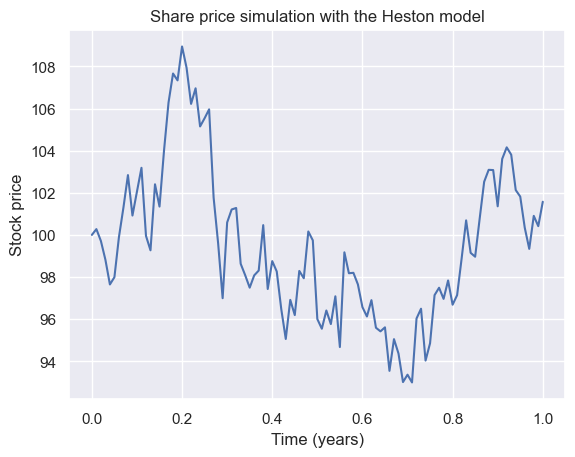

<Figure size 1000x600 with 0 Axes>

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du modèle d'Heston
S0 = 100         # Prix initial de l'action
v0 = 0.04        # Volatilité initiale
r = 0.05         # Taux d'intérêt sans risque
kappa = 3.0      # Vitesse de réversion de la volatilité
theta = 0.04     # Niveau long terme de la volatilité
sigma = 0.3      # Volatilité de la volatilité
rho = -0.7       # Coefficient de corrélation
T = 1            # Maturité de l'option en années
N = 100          # Nombre de pas de discrétisation
dt = T / N       # Intervalles de temps

# Génération de variables aléatoires gaussiennes corrélées
dw1 = np.random.normal(0, np.sqrt(dt), N)
dw2 = rho * dw1 + np.sqrt(1 - rho**2) * np.random.normal(0, np.sqrt(dt), N)

# Simulation du modèle d'Heston
S = np.zeros(N+1)
v = np.zeros(N+1)
S[0] = S0
v[0] = v0

for i in range(1, N+1):
    v[i] = v[i-1] + kappa * (theta - v[i-1]) * dt + sigma * np.sqrt(v[i-1]) * dw2[i-1]
    S[i] = S[i-1] * np.exp((r - 0.5 * v[i-1]) * dt + np.sqrt(v[i-1]) * dw1[i-1])

# Plot
plt.plot(np.linspace(0, T, N+1), S)
plt.title('Share price simulation with the Heston model')
plt.xlabel('Time (years)')
plt.ylabel('Stock price')
plt.grid(True)
plt.figure(figsize=(10, 6))
plt.show()


## SABR model

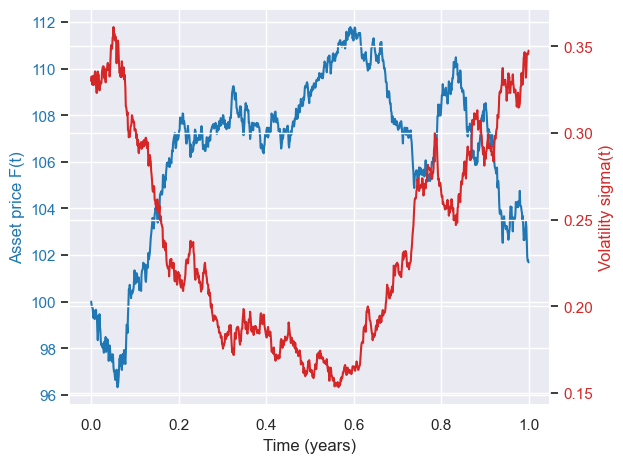

<Figure size 1000x600 with 0 Axes>

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du modèle
alpha = 0.2
beta = 0.6
rho = -0.7
F0 = 100
sigma0 = 0.33
T = 1
N = 1000
dt = T / N

# Générer les variables aléatoires avec un écart type plus élevé
np.random.seed(None)
dW = np.random.normal(0, np.sqrt(dt) * 2, N)  # Augmentation de l'écart type
dZ = rho * dW + np.sqrt(1 - rho**2) * np.random.normal(0, np.sqrt(dt) * 2, N)  # Augmentation de l'écart type

# Initialiser les listes pour stocker les valeurs de F et sigma
F = [F0]
sigma = [sigma0]

# Simulation du modèle SABR
for i in range(1, N):
    F_new = F[-1] + sigma[-1] * F[-1]**beta * dW[i]
    sigma_new = sigma[-1] + alpha * sigma[-1] * dZ[i]
    F.append(F_new)
    sigma.append(sigma_new)

# Affichage des résultats
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Time (years)')
ax1.set_ylabel('Asset price F(t)', color=color)
ax1.plot(np.arange(0, T, dt), F, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Volatility sigma(t)', color=color)
ax2.plot(np.arange(0, T, dt), sigma, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.figure(figsize=(10, 6))
plt.show()


## MBF model

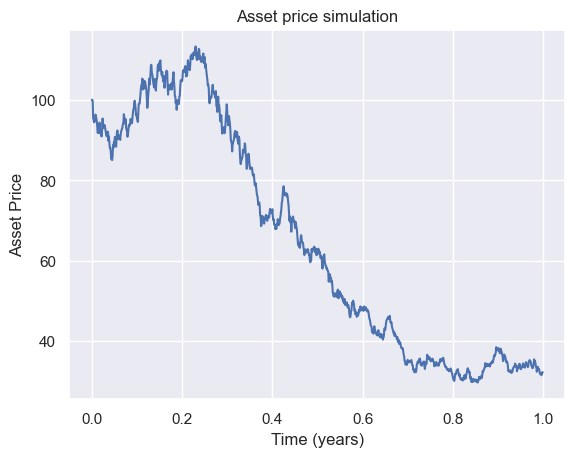

<Figure size 1000x600 with 0 Axes>

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du modèle
r = 0.03  # Taux d'intérêt sans risque
q = 0.0   # Taux de dividende
rho = -0.5  # Coefficient de corrélation
a = 0.5  # Vitesse de réversion de la volatilité
V_L = 0.25  # Niveau de long terme de la volatilité
xi = 0.1  # Volatilité de la volatilité
H = 0.9  # Exposant de Hurst
S0 = 100  # Prix initial de l'actif
V0 = 0.15  # Volatilité initiale de l'actif
T = 1.0  # Horizon temporel
N = 1000  # Nombre de pas de temps
dt = T / N  # Interval de temps

# Génération de chemins stochastiques
np.random.seed(None)
z = np.random.normal(size=N)
w = np.random.normal(size=N)
dz = np.sqrt(dt) * z
dw = np.sqrt(dt) * w
V = np.zeros(N)
S = np.zeros(N)
V[0] = V0
S[0] = S0

for t in range(1, N):
    V[t] = V[t-1] + a * (V_L - V[t-1]) * dt + xi * V[t-1]**H * np.sqrt(dt) * z[t]
    S[t] = S[t-1] * (1 + (r - q) * dt + np.sqrt(V[t]) * (rho * dz[t] + np.sqrt(1 - rho**2) * dw[t]))
    
# Plot
plt.plot(np.arange(0, T, dt), S)
plt.title('Asset price simulation')
plt.xlabel('Time (years)')
plt.ylabel('Asset Price')
plt.grid(True)
plt.figure(figsize=(10, 6))
plt.show()

## Stable Distribution 

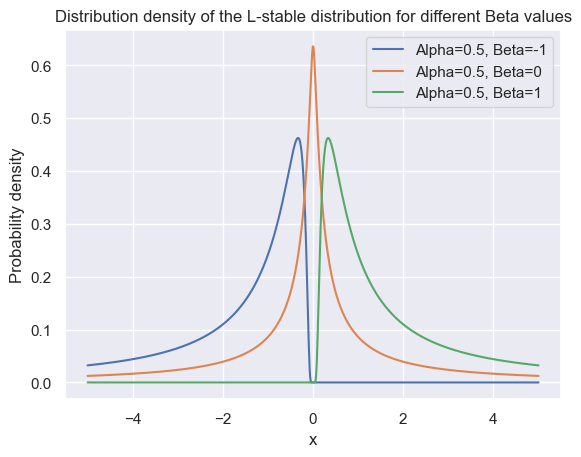

<Figure size 1000x600 with 0 Axes>

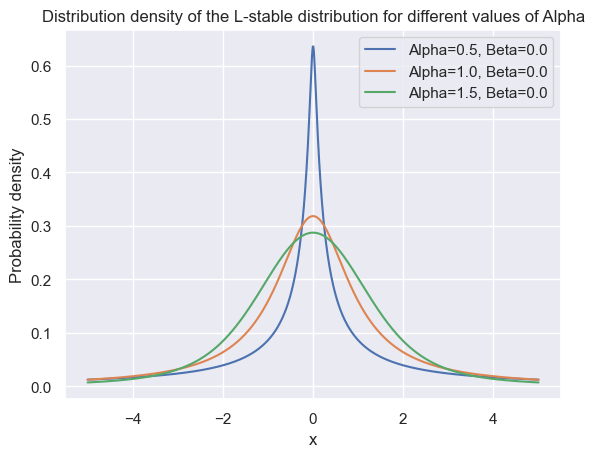

<Figure size 1000x600 with 0 Axes>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levy_stable

# Paramètres de la distribution stable
alpha_fixed = 0.5  # Valeur fixe pour alpha
beta_values = [-1, 0, 1]    # Différentes valeurs pour beta

x = np.linspace(-5, 5, 1000)  # Création d'une plage de valeurs pour x

# Tracé des densités de distribution pour différentes valeurs de beta avec alpha fixe
for beta in beta_values:
    pdf = levy_stable.pdf(x, alpha_fixed, beta)
    plt.plot(x, pdf, label=f'Alpha={alpha_fixed}, Beta={beta}')
plt.title('Distribution density of the L-stable distribution for different Beta values')
plt.xlabel('x')
plt.ylabel('Probability density')
plt.legend()
plt.grid(True)
plt.figure(figsize=(10, 6))
plt.show()

# Paramètres de la distribution stable
alpha_values = [0.5, 1.0, 1.5]  # Différentes valeurs pour alpha
beta_fixed = 0.0  # Valeur fixe pour beta

# Tracé des densités de distribution pour différentes valeurs de alpha avec beta fixe
for alpha in alpha_values:
    pdf = levy_stable.pdf(x, alpha, beta_fixed)
    plt.plot(x, pdf, label=f'Alpha={alpha}, Beta={beta_fixed}')
plt.title('Distribution density of the L-stable distribution for different values of Alpha')
plt.xlabel('x')
plt.ylabel('Probability density')
plt.legend()
plt.grid(True)
plt.figure(figsize=(10, 6))
plt.show()


## Stable Distribution in practice

In [13]:
end_date = datetime.date(2024,4,21)
start_date = datetime.date(2020,1,1)
tickers = ['^GSPC']

stock = yf.download(tickers, start_date, end_date)
stock = stock['Adj Close']
stock_return = stock / stock.shift(1) - 1
stock_return = stock_return.dropna()

# Calcul du skewness
skewness = skew(stock_return)
print("Skewness:", round(skewness,2))

# Calcul du kurtosis
kurt = kurtosis(stock_return)
print("Kurtosis:", round(kurt,2))

# Test de Jarque-Bera
jb_test = jarque_bera(stock_return)
print("Jarque-Bera test statistic:", round(jb_test[0],2))
print("Jarque-Bera p-value:", round(jb_test[1],2))

[*********************100%***********************]  1 of 1 completed
Skewness: -0.48
Kurtosis: 12.3
Jarque-Bera test statistic: 6860.64
Jarque-Bera p-value: 0.0


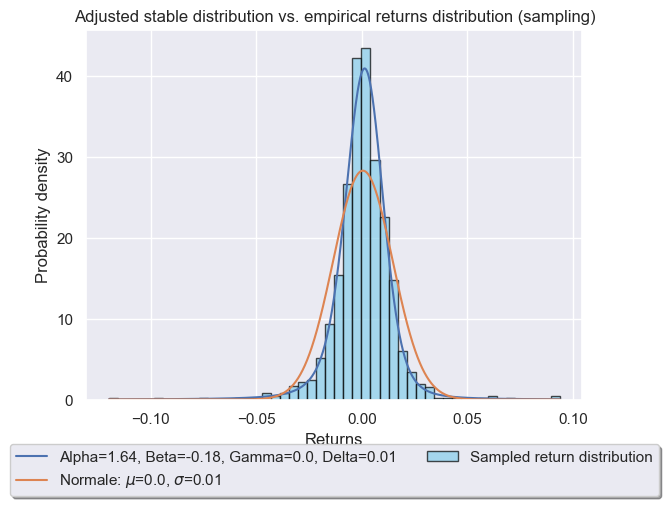

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levy_stable, norm

# Définir le nombre d'échantillons à utiliser
n_samples = len(stock_return)  # Vous pouvez ajuster ce nombre selon la taille de vos données

# Échantillonner aléatoirement les données de rendements
sampled_data = np.random.choice(stock_return, size=n_samples, replace=False)

# Ajuster la distribution stable aux données échantillonnées
params = levy_stable.fit(sampled_data)

# Créer un ensemble de valeurs x
x = np.linspace(np.min(sampled_data), np.max(sampled_data), 1000)

# Calculer la densité de probabilité de la distribution stable ajustée
pdf = levy_stable.pdf(x, *params)

# Calculer la densité de probabilité d'une distribution normale
mu, sigma = np.mean(sampled_data), np.std(sampled_data)
pdf_normal = norm.pdf(x, mu, sigma)

plt.plot(x, pdf, label=f'Alpha={round(params[0],2)}, Beta={round(params[1],2)}, Gamma={round(params[2],2)}, Delta={round(params[3],2)}')
plt.plot(x, pdf_normal, label=f'Normale: $\mu$={round(mu,2)}, $\sigma$={round(sigma,2)}')
plt.hist(sampled_data, bins=50, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Sampled return distribution')

plt.title('Adjusted stable distribution vs. empirical returns distribution (sampling)')
plt.xlabel('Returns')
plt.ylabel('Probability density')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2)
plt.grid(True)
plt.show()

In [15]:
from scipy.integrate import quad

# Définir la limite inférieure de l'intégration
lower_limit = -np.inf

# Définir la limite supérieure de l'intégration
upper_limit = -0.15

# Calculer la probabilité pour la distribution stable
prob_stable, _ = quad(levy_stable.pdf, lower_limit, upper_limit, args=params)

# Calculer la probabilité pour la distribution normale
prob_normal, _ = quad(norm.pdf, lower_limit, upper_limit, args=(mu, sigma))

prob_normal_percent = prob_normal * 100
prob_stable_percent = prob_stable * 100

print("Probability of stable distribution P(x < 0.10) :", round(prob_stable_percent,2), "%")
print("Probability for normal distribution P(x < 0.10) :", round(prob_normal_percent,2), "%")

Probability of stable distribution P(x < 0.10) : 0.12 %
Probability for normal distribution P(x < 0.10) : 0.0 %


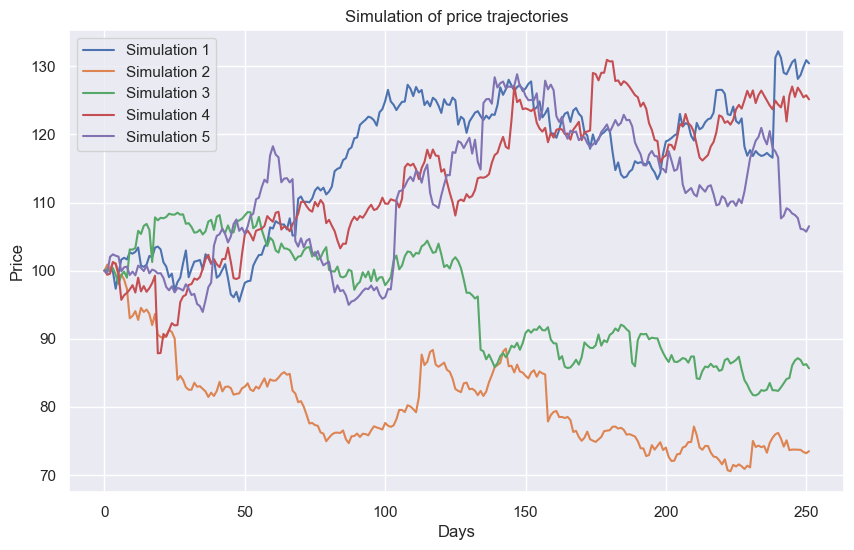

In [20]:
# Simuler plusieurs trajectoires de prix
n_days = 252  # Nombre de jours pour la simulation
initial_price = 100  # Prix initial
n_simulations = 5  # Nombre de simulations

plt.figure(figsize=(10, 6))

for i in range(n_simulations):
    prices = np.zeros(n_days)
    prices[0] = initial_price
    
    # Générer des rendements à partir de la distribution stable ajustée
    returns = levy_stable.rvs(*params, size=n_days-1)
    
    # Calculer les prix successifs
    for t in range(1, n_days):
        prices[t] = prices[t-1] * (1 + returns[t-1])
    
    # Tracer la trajectoire de prix
    plt.plot(prices, label=f'Simulation {i+1}')

plt.title('Simulation of price trajectories')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()